In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

# Question 3:

part 2:

In [2]:
#define image1 here
image1 = np.array([[150, 151, 153, 155, 156, 155, 154],
                   [150, 151, 153, 155, 156, 155, 154],
                   [150, 151, 153, 155, 156, 155, 154],
                   [150, 151, 153, 155, 156, 155, 154],
                   [150, 151, 153, 155, 156, 155, 154]] , np.uint8)

In [3]:
#code here
#first define a function for calculating histogram
def calc_hist(image):
    hist = cv2.calcHist([image],[0],None,[256],[0,256])
    return(hist)

Text(0.5, 1.0, 'histogram')

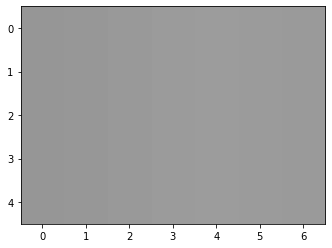

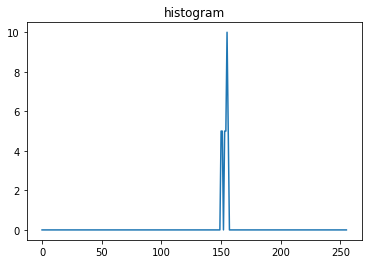

In [4]:
#dont change this cell
plt.imshow(image1,cmap='gray',vmin=0,vmax=255)
plt.figure()
plt.plot(calc_hist(image1))
plt.title('histogram')

In [5]:
#code here
#define a function (stretch) for stretching(input:image , output: stretched image)

def stretch_hist(image):
  '''
  don't use libraries
  input(s):
    image (ndarray): input image
  output(s):
    output_image (ndarray): enhanced image with histogram stretching
  '''
  output_image = image.copy()
  # Start
  #we had (MAX - MIN) * (F(x,y) - Fmin) / (Fmax - Fmin) so the operations below does this
  #constant is (MAX - MIN) /(Fmax - Fmin)
  constant = 255 / (output_image.max() - output_image.min())
  #then (F(x,y) - Fmin) *
  output_image = np.round((output_image - output_image.min()) * constant)
  # End
  return np.uint8(output_image)


Text(0.5, 1.0, 'new histogram')

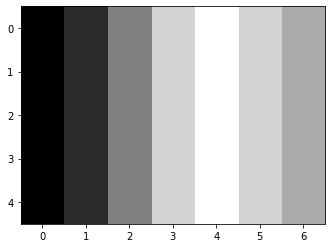

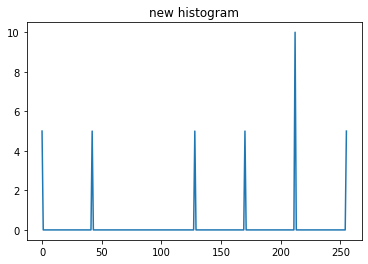

In [6]:
#dont change this cell
plt.imshow(stretch_hist(image1),cmap='gray',vmin=0,vmax=255)
plt.figure()
plt.plot(calc_hist(stretch_hist(image1)))
plt.title('new histogram')

# part3


Text(0.5, 1.0, 'new histogram')

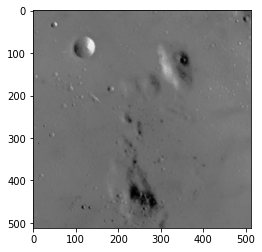

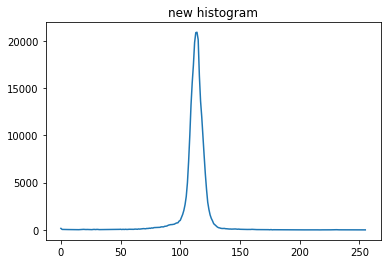

In [25]:
# first read the image and show it.(image2)
import cv2
image2 = plt.imread('image2.jpg')
plt.imshow(image2)

plt.imshow(stretch_hist(image2),cmap='gray',vmin=0,vmax=255)
plt.figure()
plt.plot(calc_hist(stretch_hist(image2)))
plt.title('new histogram')

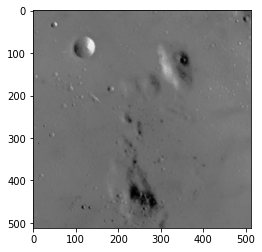

In [26]:
#use stretch function to improve quality of the image and show it
plt.imshow(stretch_hist(image2),cmap='gray',vmin=0,vmax=255)

In [71]:
def modified_stretch_hist(image):
  '''
  don't use libraries
  input(s):
    image (ndarray): input image
  output(s):
    output_image (ndarray): enhanced image with modified histogram stretching
  '''

  output_image = image.copy()

  # cdf 
  cdf = calc_hist(image).cumsum()
 
  # then we normalize the cdf
  # cdf / cdf.max() is smaller than 1 or a bit more so we multiply it by 255
  cdf_normal = cdf / cdf.max() * 255
  
  # then find the matching of each number in normalized histogram to the numbers in image
  table = np.interp(image.flatten() , np.arange(256) ,cdf_normal).reshape(image.shape)
  
  # change the numbers more than 255 to 255 
  output_image = np.clip(table, 0, 255)
 
  return np.uint8(output_image)


Text(0.5, 1.0, 'new histogram')

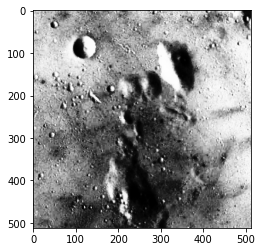

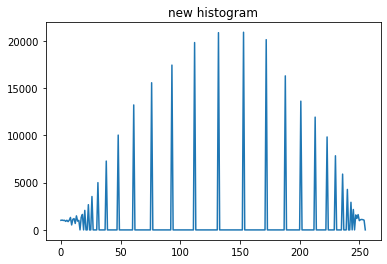

In [72]:
#try your new function and show the result

plt.imshow(modified_stretch_hist(image2),cmap='gray',vmin=0,vmax=255)
plt.figure()
plt.plot(calc_hist(modified_stretch_hist(image2)))
plt.title('new histogram')
